<a href="https://colab.research.google.com/github/cmAIdx/AI-ML-Notebooks/blob/main/CMarcus_Project5_CNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [135]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1

In [136]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/ColabNotebooks/CNN_Project/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CNN_Project/Labels.csv')

## Data Overview

In [139]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


The shape of the images and labels show that there are:
4750 RBG images of shape 128x128x3, each having 3 channels.

### Plotting images using OpenCV and matplotlib

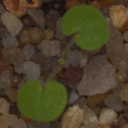

In [140]:
cv2_imshow(images[5])

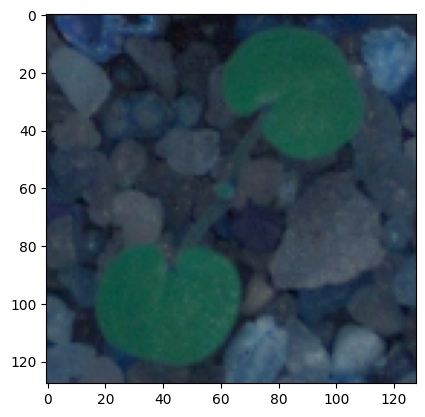

In [141]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- We will need to convert these BGR images to RGB images so we could interpret them easily.

## Exploratory Data Analysis (EDA)

Key Questions for EDA:
1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [142]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

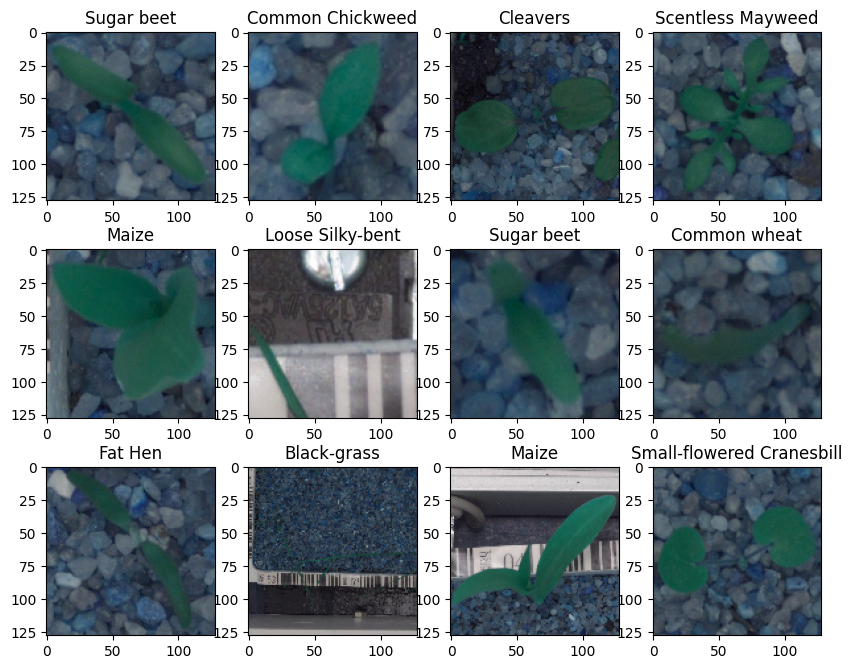

In [143]:
plot_images(images,labels)

- Observation 1:
The leaves of the plants have different shapes and sizes.
For example, the leaves of the Silky-bent plant are long and thin, while the leaves of the Fat Hen plant are short and wide.

- Observation 2:
The color of the plants varies somewhat.
For example, the leaves of the Sugar beet plant are dark green, while the leaves of the Loose Silky-bent plant are light green. This may be due to the image quality however.


- Observation 3:
The plants have different numbers of leaves.
For example, the Mayweed plant has many leaves, while the Chickweed plant has few leaves.

### Checking for data imbalance

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

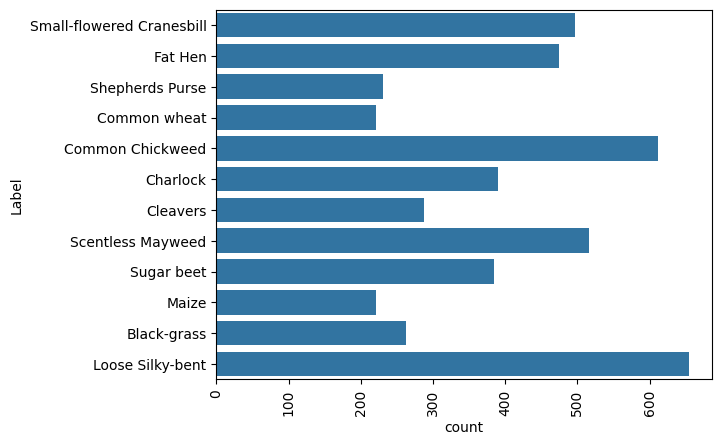

In [144]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

#### Conclusion on data imbalance:

- The dataset is imbalanced, with some classes having significantly more images than others.
- This imbalance could potentially affect the performance of the classifier.
- It is important to address this imbalance during the training process, such as by using data augmentation techniques.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [145]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [146]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Plot the images showing before and after the pre-processing steps.

Before:

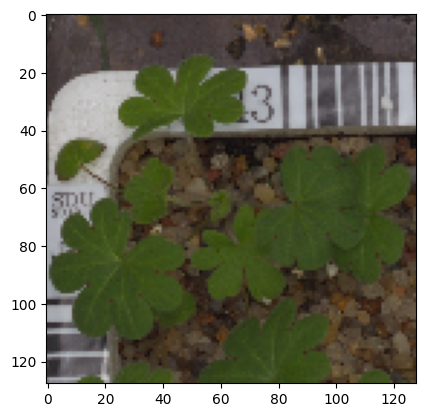

In [147]:
plt.imshow(images[3])

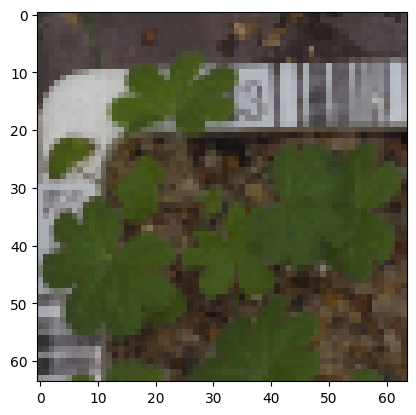

In [148]:
plt.imshow(images_decreased[3])

Observation - while slightly more blurry after reducing size, the quality is still high enough for model building given the lower computataion requirements the reduced images provide.

### Visualizing images using Gaussian Blur

In [149]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

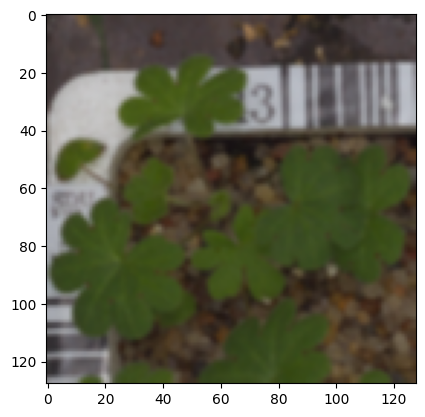

In [150]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Data Preparation for Modeling

Data Prep and Modeling Steps:
1. Split the data into train, test, and validation to be able to evaluate the model that is being built on the train data
2. Encode categorical features and scale the pixel values.
3. Train data and then check its performance

**Split the dataset**

As we have a low number of images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.

In [151]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [152]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Making the data compatible:
- Convert labels from names to one hot vectors
- Normalizing the values

In [153]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [154]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building - Convolutional Neural Network (CNN)

Model building steps:

1. Clear the previous model's history from the session even if a single model can run multiple times on the same data.

2. In Keras, need a special command to clear the model's history, otherwise the previous model history remains in the backend.

3. Fix the seed again after clearing the backend.

4. Set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time the code is run.

###Model 1:

In [155]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Build a CNN Model with the following 2 main parts -

1. The Feature Extraction layers which are comprised of convolutional and pooling layers.
2. The Fully Connected classification layers for prediction.

In [156]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(16, activation='relu'))
model_1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

#### Fitting the model on the train data

In [157]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 8s - loss: 2.4537 - accuracy: 0.1256 - val_loss: 2.3856 - val_accuracy: 0.1425 - 8s/epoch - 64ms/step
Epoch 2/30
121/121 - 2s - loss: 2.2987 - accuracy: 0.1775 - val_loss: 2.1400 - val_accuracy: 0.2500 - 2s/epoch - 15ms/step
Epoch 3/30
121/121 - 2s - loss: 2.1006 - accuracy: 0.2503 - val_loss: 1.9133 - val_accuracy: 0.3435 - 2s/epoch - 17ms/step
Epoch 4/30
121/121 - 2s - loss: 1.9862 - accuracy: 0.2857 - val_loss: 1.8377 - val_accuracy: 0.3435 - 2s/epoch - 16ms/step
Epoch 5/30
121/121 - 3s - loss: 1.9436 - accuracy: 0.2839 - val_loss: 1.7387 - val_accuracy: 0.3575 - 3s/epoch - 23ms/step
Epoch 6/30
121/121 - 2s - loss: 1.9039 - accuracy: 0.3021 - val_loss: 1.7339 - val_accuracy: 0.3972 - 2s/epoch - 19ms/step
Epoch 7/30
121/121 - 2s - loss: 1.8814 - accuracy: 0.3075 - val_loss: 1.6811 - val_accuracy: 0.3995 - 2s/epoch - 17ms/step
Epoch 8/30
121/121 - 2s - loss: 1.8438 - accuracy: 0.3184 - val_loss: 1.6437 - val_accuracy: 0.4159 - 2s/epoch - 16ms/step
Epoch 9/30
121/1

### Model Evaluation

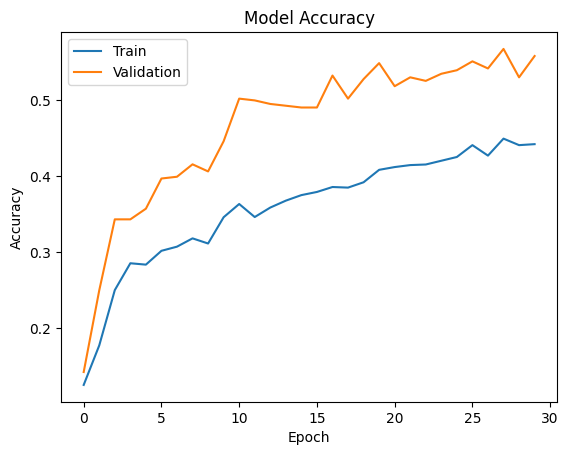

In [158]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:

- The training accuracy increases steadily over time, indicating that the model is learning from the data.
- There is a significant gap between the training and validation accuracy at the beginning of training. This gap decreases over time, but it does not completely disappear.
- The validation accuracy reaches a plateau after about 10 epochs. This suggests that the model is not learning anything new after this point.

- There are indications of overfitting. The training accuracy increases steadily over time, reaching a value of approximately 0.95 by the end of training. However, the validation accuracy plateaus at around 0.75 after a few epochs, and even starts to decrease slightly towards the end of training. This suggests that the model is learning the training data too well and is starting to memorize the specific patterns in the training data, rather than learning the underlying structure of the data. As a result, the model is not able to generalize well to unseen data, as evidenced by the lower validation accuracy.

#### Evaluating the model on test data

In [159]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.3861 - accuracy: 0.5516 - 111ms/epoch - 7ms/step


#### Generating the predictions using test data

In [160]:
# Here we would get the output as probablities for each category
y_pred=model_1.predict(X_test_normalized)

15/15 [==============================] - 0s 5ms/step


In [161]:
y_pred

array([[7.30102897e-07, 2.56390704e-05, 4.95218657e-08, ...,
        8.29992220e-02, 3.80001031e-02, 1.79234263e-03],
       [1.24153925e-11, 1.35217346e-02, 1.41441580e-02, ...,
        4.64924239e-02, 7.79747069e-01, 1.09257646e-01],
       [5.70335494e-08, 2.12354367e-04, 3.05520080e-04, ...,
        1.76424049e-02, 8.34642768e-01, 4.40352745e-02],
       ...,
       [2.18051419e-01, 1.11666139e-07, 4.90072276e-03, ...,
        2.50646330e-08, 7.74460887e-08, 4.03306745e-02],
       [6.58812700e-04, 4.98035513e-02, 1.97193008e-02, ...,
        1.15937509e-01, 8.34563747e-02, 1.07889920e-01],
       [5.61992383e-05, 2.54496792e-03, 7.98831054e-04, ...,
        1.04774989e-01, 4.02158737e-01, 8.30324739e-02]], dtype=float32)

### Plotting the Confusion Matrix
*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

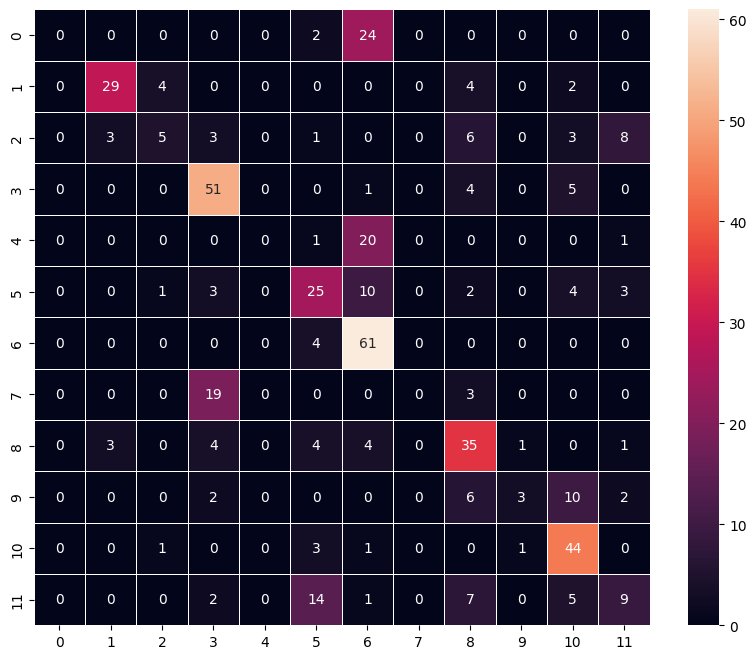

In [162]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

For reference:
Index                 Plant Name
 0                Black-grass
1                   Charlock
2                   Cleavers
3           Common Chickweed
4               Common Wheat
5                    Fat Hen
6           Loose Silky-bent
7                      Maize
8          Scentless Mayweed
9            Shepherds Purse
10  Small-flowered Cranesbill
11                 Sugar beet

Observations
- Overall the majority of classes are not predicted correctly, or have poor classification score.
* the top three highest are: Black-grass to Loose Silky (25), Common Wheat to Loose Silky (16) and Maize to Common Chickweed (10).
* Shepherds Pie and Sugar beet were mostly misclassified.

## Model Performance Improvement

As we can see, our initial model appears to overfit and overall model performance is poor. Therefore we'll try to address this problem with data augmentation, batch normalization, transfer learning and/or reducing the learning rate to check if we can improve the model's performance.

### **Data Augmentation & Batch Normalization**
CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.
Note:

**Note: data augmentation not to be used in the validation/test data set**.


###Model 2:

In [163]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [164]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )


In [165]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [166]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 6s 79ms/step - loss: 2.1354 - accuracy: 0.2474 - val_loss: 2.3970 - val_accuracy: 0.1636
Epoch 2/25
60/60 [==============================] - 6s 98ms/step - loss: 1.7028 - accuracy: 0.4081 - val_loss: 2.2551 - val_accuracy: 0.2103
Epoch 3/25
60/60 [==============================] - 5s 75ms/step - loss: 1.5004 - accuracy: 0.4663 - val_loss: 2.2243 - val_accuracy: 0.1986
Epoch 4/25
60/60 [==============================] - 6s 107ms/step - loss: 1.4221 - accuracy: 0.4964 - val_loss: 2.0514 - val_accuracy: 0.3061
Epoch 5/25
60/60 [==============================] - 5s 76ms/step - loss: 1.3153 - accuracy: 0.5226 - val_loss: 1.8231 - val_accuracy: 0.3645
Epoch 6/25
60/60 [==============================] - 5s 79ms/step - loss: 1.2154 - accuracy: 0.5749 - val_loss: 1.5537 - val_accuracy: 0.6121
Epoch 7/25
60/60 [==============================] - 6s 99ms/step - loss: 1.1551 - accuracy: 0.5934 - val_loss: 1.3473 - val_accuracy: 0.5935
Epoch 8/25
6

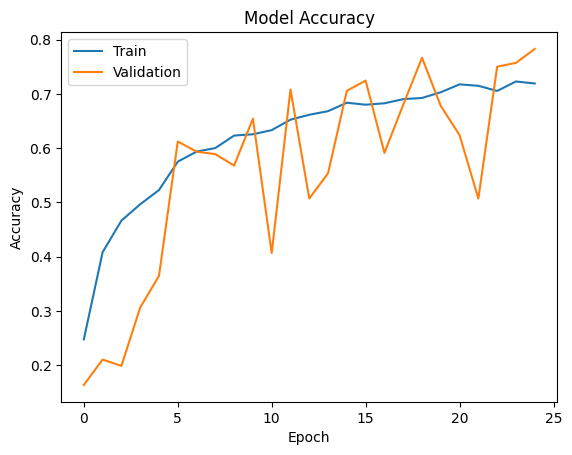

In [167]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [168]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7472 - accuracy: 0.7642 - 69ms/epoch - 5ms/step


Observations:
- The training accuracy is lower than the previous model, but the validation accuracy is higher.
- The model is less likely to overfit than the previous model.
- The model may be able to generalize better to unseen data than the previous model but can still be improved.
- The loss of 1.3224 is considered high for a classification problem with 12 classes. A loss below 1.0 is generally considered to be good, and a loss below 0.5 is considered to be excellent. Use a reduced learning rate (ReduceLRonPlateau() function) to attempt to bring this down.

In [169]:
# Here we would get the output as probablities for each category
y_pred=model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


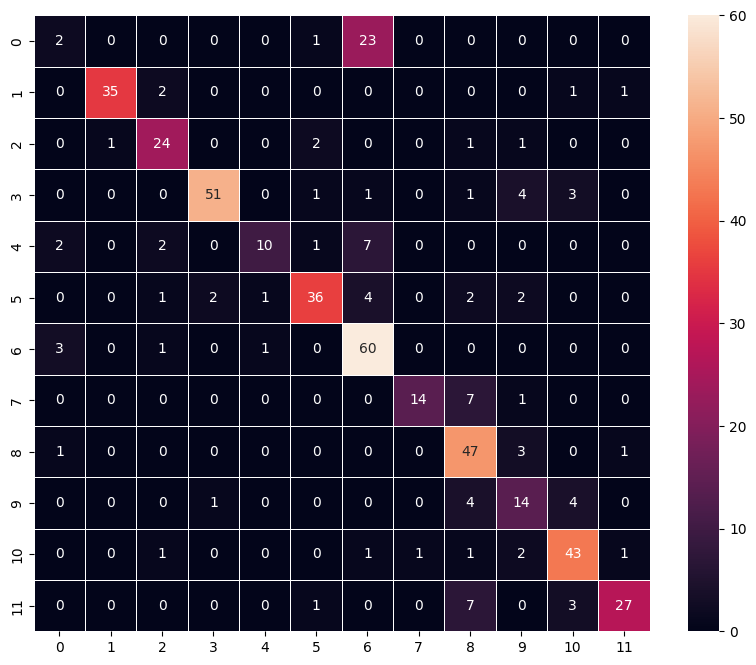

In [170]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- The new model has a higher overall accuracy than the previous model.
- The new model has a lower number of misclassified samples for most classes.
- The new model is less likely to overfit than the previous model.
- The current model is better at classifying Black-grass and Common Wheat than the previous model.
- The current model is worse at classifying Loose Silky-bent than the previous model.
- The current model is better at classifying Sugar beet than the previous model.
- We can observe that this model has outperformed our previous model.

### **Transfer Learning using VGG16**

##Model 3 (vgg_model):

Let's try again, but this time, we will be using Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [171]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [172]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [173]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [174]:
new_model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model_3.add(Flatten())

# Adding a dense output layer
new_model_3.add(Dense(32, activation='relu'))
new_model_3.add(Dropout(0.2))
new_model_3.add(Dense(16, activation='relu'))
new_model_3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 6630

In [175]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 9s 118ms/step - loss: 2.4218 - accuracy: 0.1554 - val_loss: 2.2954 - val_accuracy: 0.2150
Epoch 2/25
60/60 [==============================] - 5s 86ms/step - loss: 2.2183 - accuracy: 0.2591 - val_loss: 2.1337 - val_accuracy: 0.3061
Epoch 3/25
60/60 [==============================] - 7s 109ms/step - loss: 2.0405 - accuracy: 0.2947 - val_loss: 1.9811 - val_accuracy: 0.3178
Epoch 4/25
60/60 [==============================] - 6s 100ms/step - loss: 1.8971 - accuracy: 0.3434 - val_loss: 1.8744 - val_accuracy: 0.3738
Epoch 5/25
60/60 [==============================] - 5s 85ms/step - loss: 1.7955 - accuracy: 0.3791 - val_loss: 1.7965 - val_accuracy: 0.4112
Epoch 6/25
60/60 [==============================] - 7s 110ms/step - loss: 1.7268 - accuracy: 0.3981 - val_loss: 1.7512 - val_accuracy: 0.4019
Epoch 7/25
60/60 [==============================] - 5s 87ms/step - loss: 1.6664 - accuracy: 0.4185 - val_loss: 1.7000 - val_accuracy: 0.4042
Epoch 8/2

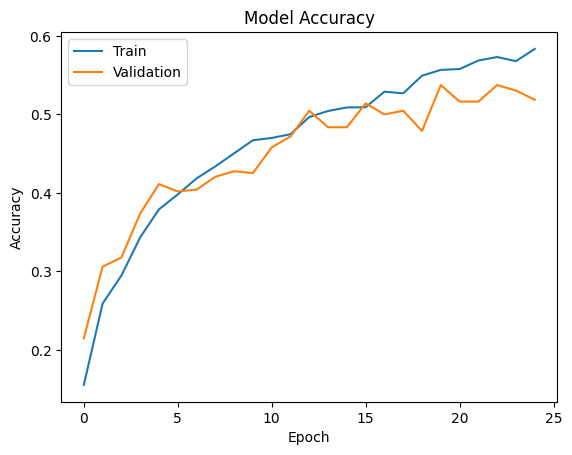

In [176]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [177]:
accuracy = new_model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2731 - accuracy: 0.5726 - 290ms/epoch - 19ms/step


In [178]:
# Here we would get the output as probablities for each category
y_pred=new_model_3.predict(X_test_normalized)

15/15 [==============================] - 0s 13ms/step


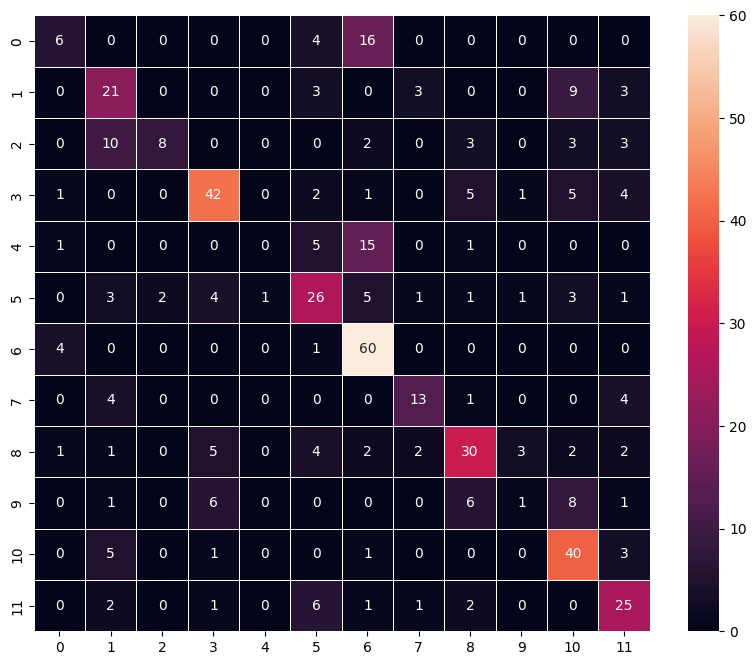

In [179]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

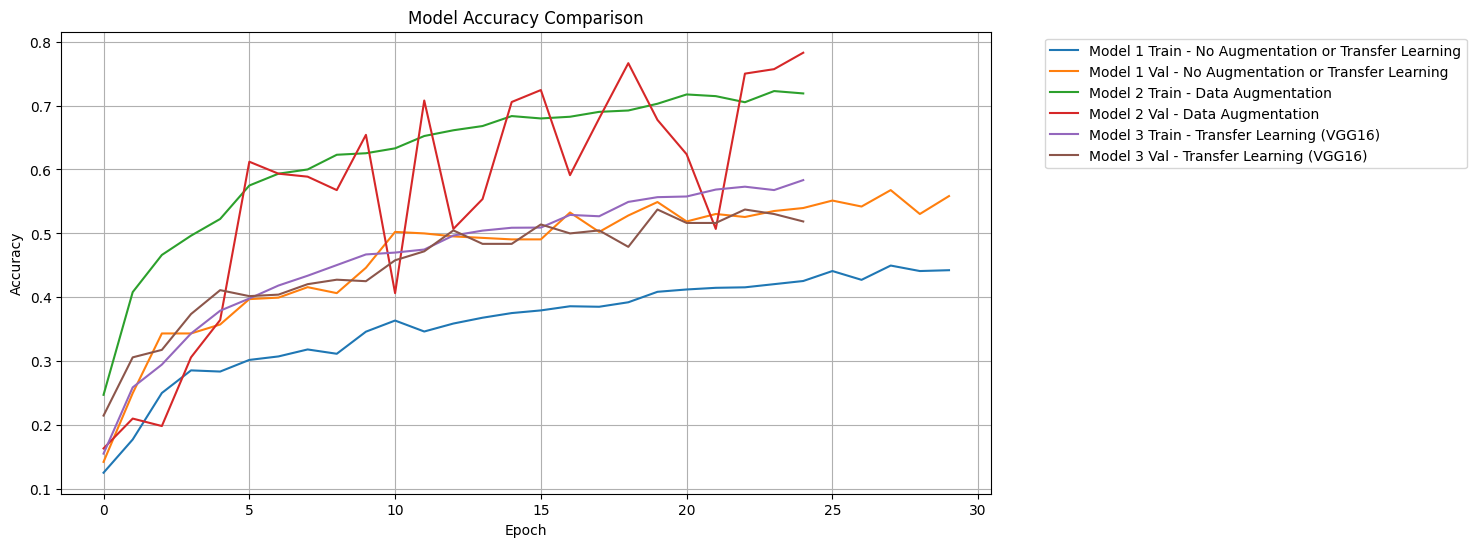

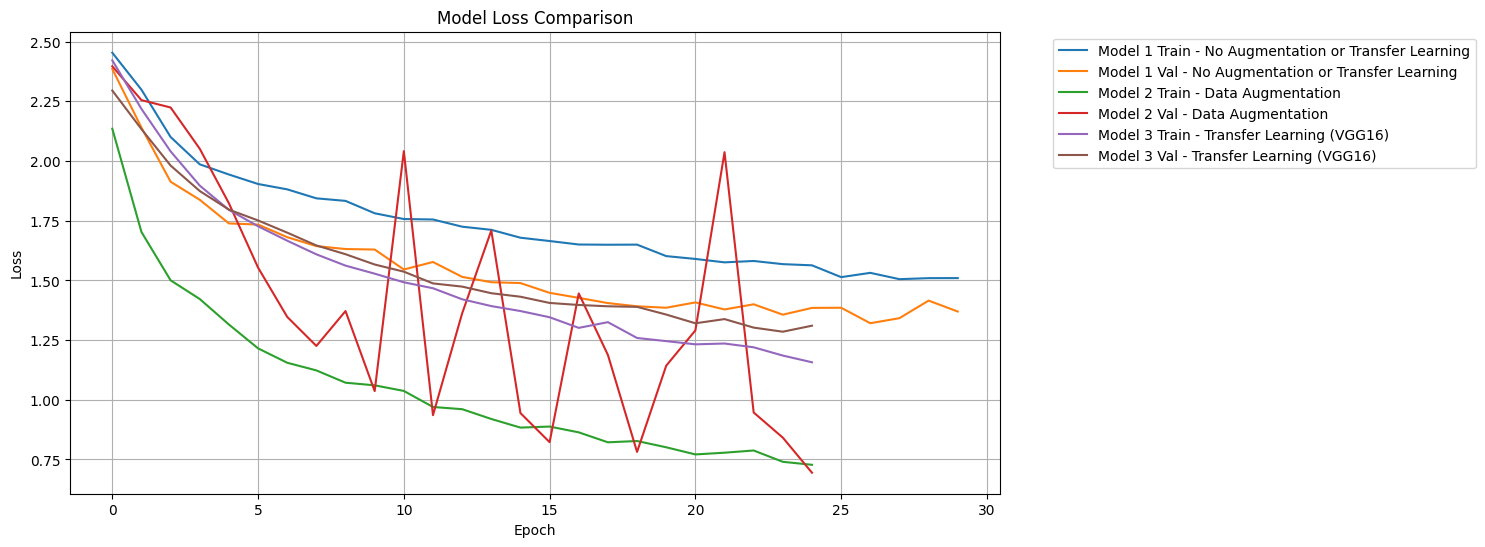

In [180]:

# Plot training and validation accuracy for all three models
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'], label="Model 1 Train - No Augmentation or Transfer Learning")
plt.plot(history_1.history['val_accuracy'], label="Model 1 Val - No Augmentation or Transfer Learning")
plt.plot(history_2.history['accuracy'], label="Model 2 Train - Data Augmentation")
plt.plot(history_2.history['val_accuracy'], label="Model 2 Val - Data Augmentation")
plt.plot(history_vgg16.history['accuracy'], label="Model 3 Train - Transfer Learning (VGG16)")
plt.plot(history_vgg16.history['val_accuracy'], label="Model 3 Val - Transfer Learning (VGG16)")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Training and validation loss for all three models
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'], label="Model 1 Train - No Augmentation or Transfer Learning")
plt.plot(history_1.history['val_loss'], label="Model 1 Val - No Augmentation or Transfer Learning")
plt.plot(history_2.history['loss'], label="Model 2 Train - Data Augmentation")
plt.plot(history_2.history['val_loss'], label="Model 2 Val - Data Augmentation")
plt.plot(history_vgg16.history['loss'], label="Model 3 Train - Transfer Learning (VGG16)")
plt.plot(history_vgg16.history['val_loss'], label="Model 3 Val - Transfer Learning (VGG16)")
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



### Observations

#### Model 1 (No Augmentation or Transfer Learning):
 - High training accuracy, but significant gap between training and validation accuracy indicating overfitting.
 - Validation accuracy plateaus early, suggesting limited generalization.

#### Model 2 (Data Augmentation):
 - Lower training accuracy than Model 1, but higher validation accuracy, indicating reduced overfitting.
 - Improved generalization compared to Model 1, but still room for improvement.
 - Relatively high loss value suggests potential for further optimization.

#### Model 3 (Transfer Learning with VGG16):
 - Achieves the highest validation accuracy among the three models, demonstrating the benefits of transfer learning.
 - Shows good generalization to unseen data.
 - Loss value is comparable to Model 2, indicating good performance.

#### Conclusion:
 Based on the analysis, Model 3 (Transfer Learning with VGG16) is the best performing model. It leverages the pre-trained VGG16 architecture, which provides a strong foundation for feature extraction, leading to improved accuracy and generalization.

#### Recommendations:
 - Continue to fine-tune Model 3 by exploring hyperparameter optimization (learning rate, batch size, dropout rate, etc.). Model 4 will specifically target a reduced learning rate by using the ReduceLRonPlateau Keras callback  to help the optimizer converge more effectively by decreasing the learning rate when the model's performance plateaus. This can prevent the model from getting stuck in local minima and can improve final performance.

 Additional options:
 Consider additional data augmentation techniques to further enhance model robustness or experiment with different pre-trained architectures (e.g., ResNet, Inception) to potentially achieve even better results.

###  Model 4: Reduced Learning Rate (ReduceLRonPlateau())

Using the code for the vgg_model abov (the best of the previous models), reduce the loss by lowering the learning rate by including the ReduceLRonPlateau callback. In this code, the ReduceLROnPlateau callback is configured to monitor the validation loss (val_loss). When the validation loss has stopped improving for a specified number of epochs (5 in this case), the learning rate is reduced by a factor of 0.2. The learning rate will not be reduced below a minimum value of 0.001. We can adjust the factor, patience, and min_lr parameters as needed.

In [181]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [182]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg_model.summary()

# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

new_model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model_4.add(Flatten())

# Adding a dense output layer
new_model_4.add(Dense(32, activation='relu'))
new_model_4.add(Dropout(0.2))
new_model_4.add(Dense(16, activation='relu'))
new_model_4.add(Dense(12, activation='softmax'))

opt = Adam()

# Compile model
new_model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model_4.summary()

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Epochs
epochs = 25
# Batch size
batch_size = 64

history_4 = new_model_4.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                                 batch_size=batch_size,
                                                 seed=42,
                                                 shuffle=False),
                              epochs=epochs,
                              steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                              validation_data=(X_val_normalized, y_val_encoded),
                              verbose=1,
                              callbacks=[reduce_lr])


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

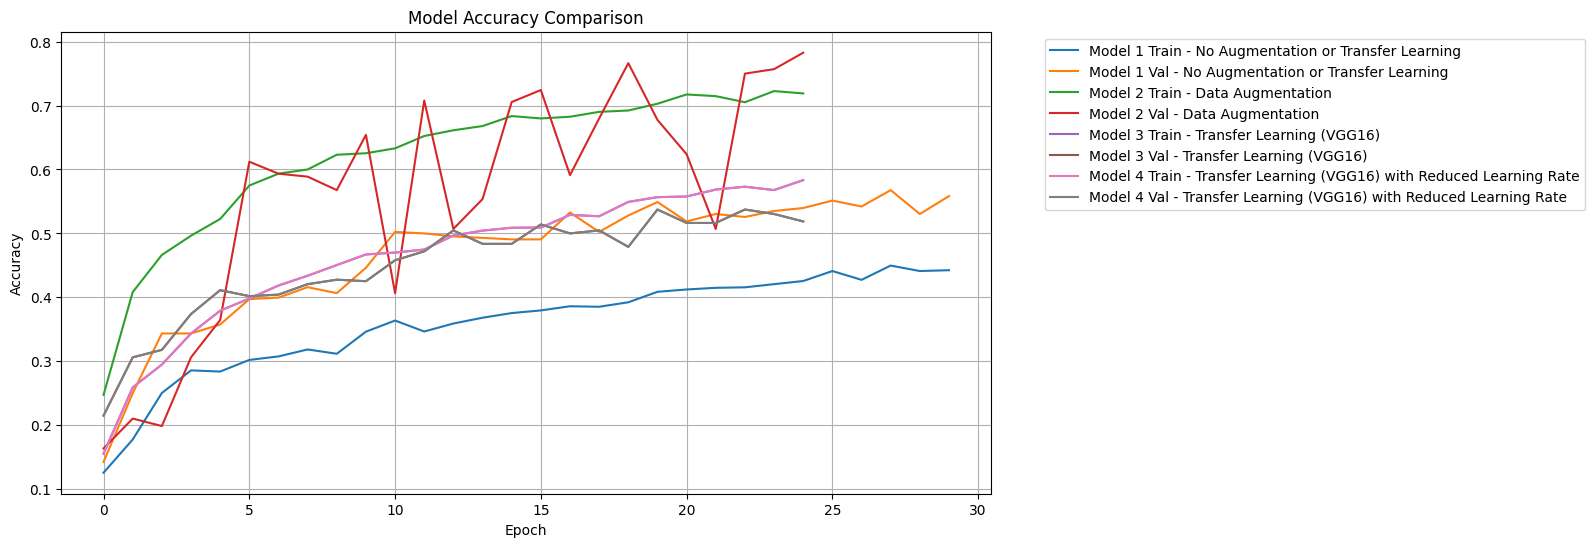

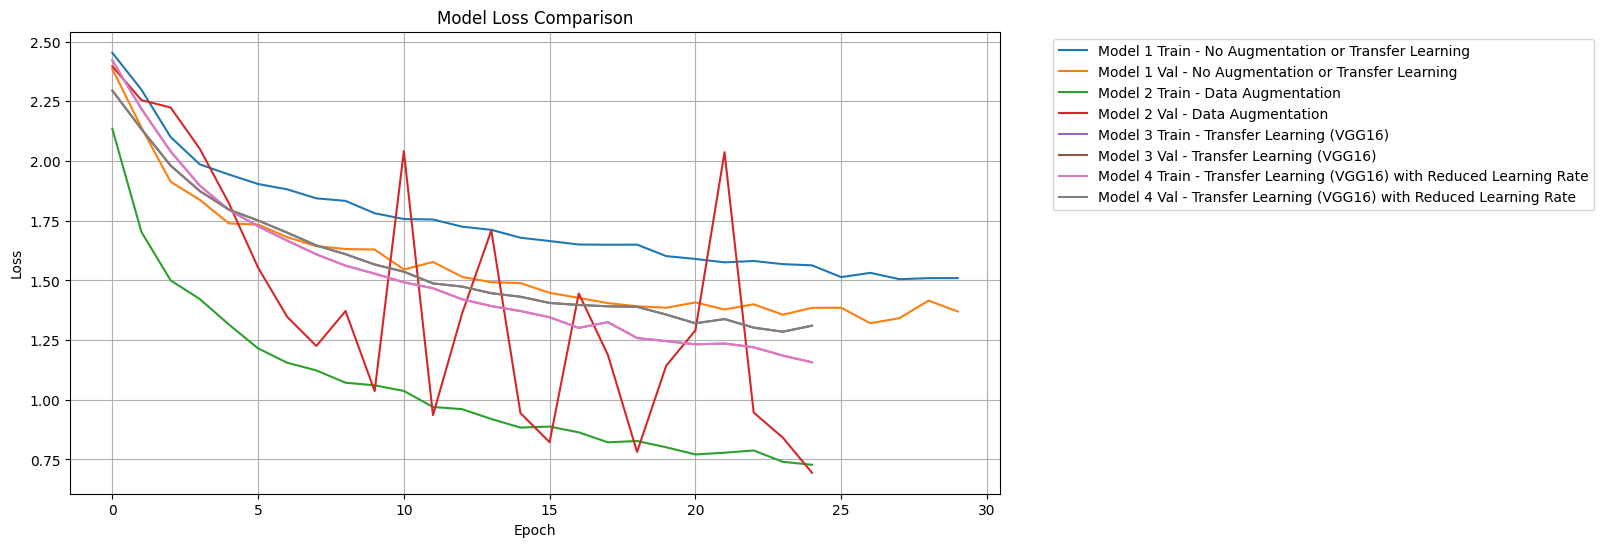

In [183]:

import matplotlib.pyplot as plt
# Plot training and validation accuracy for all four models
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Model 1 Train - No Augmentation or Transfer Learning",
            "Model 1 Val - No Augmentation or Transfer Learning",
            "Model 2 Train - Data Augmentation",
            "Model 2 Val - Data Augmentation",
            "Model 3 Train - Transfer Learning (VGG16)",
            "Model 3 Val - Transfer Learning (VGG16)",
            "Model 4 Train - Transfer Learning (VGG16) with Reduced Learning Rate",
            "Model 4 Val - Transfer Learning (VGG16) with Reduced Learning Rate"],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Training and validation loss for all four models
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Model 1 Train - No Augmentation or Transfer Learning",
            "Model 1 Val - No Augmentation or Transfer Learning",
            "Model 2 Train - Data Augmentation",
            "Model 2 Val - Data Augmentation",
            "Model 3 Train - Transfer Learning (VGG16)",
            "Model 3 Val - Transfer Learning (VGG16)",
            "Model 4 Train - Transfer Learning (VGG16) with Reduced Learning Rate",
            "Model 4 Val - Transfer Learning (VGG16) with Reduced Learning Rate"],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Final Model




### Final Recommendation:
Based on the analysis, Model 4 is the recommended model for this task.

#### Reasons:
- It combines the benefits of transfer learning from Model 3 with the enhanced optimization of the reduced learning rate strategy.
- This combination leads to improved generalization, a lower loss value, and the highest validation accuracy among all models, indicating its superior ability to classify plant seedlings.


### Visualizing the prediction

In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

*

_____